## Ventas y Costos de Publicidad

La base de datos contiene información sobre las ventas de productos, expresadas en miles de unidades, y los gastos en publicidad, medidos en miles de dólares. Los gastos en publicidad se dividen en tres categorías: TV, Radio y Periódicos (Newspaper). El objetivo es determinar cuál de estos gastos publicitarios genera el mayor impacto en las ventas, es decir, identificar cuál inversión tiene la mayor influencia en el volumen de ventas

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from scipy.stats import ttest_1samp, shapiro, kstest, anderson, probplot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datos = 'https://drive.google.com/uc?export=download&id=1ElQO0RpFbatK5KTa8HkHS-6j71hhMNwl'

df4 = pd.read_csv(datos)

In [4]:
df4.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##Se elimina la columna de indices

In [5]:
df4.drop("Unnamed: 0", axis = 1, inplace = True)
df4.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


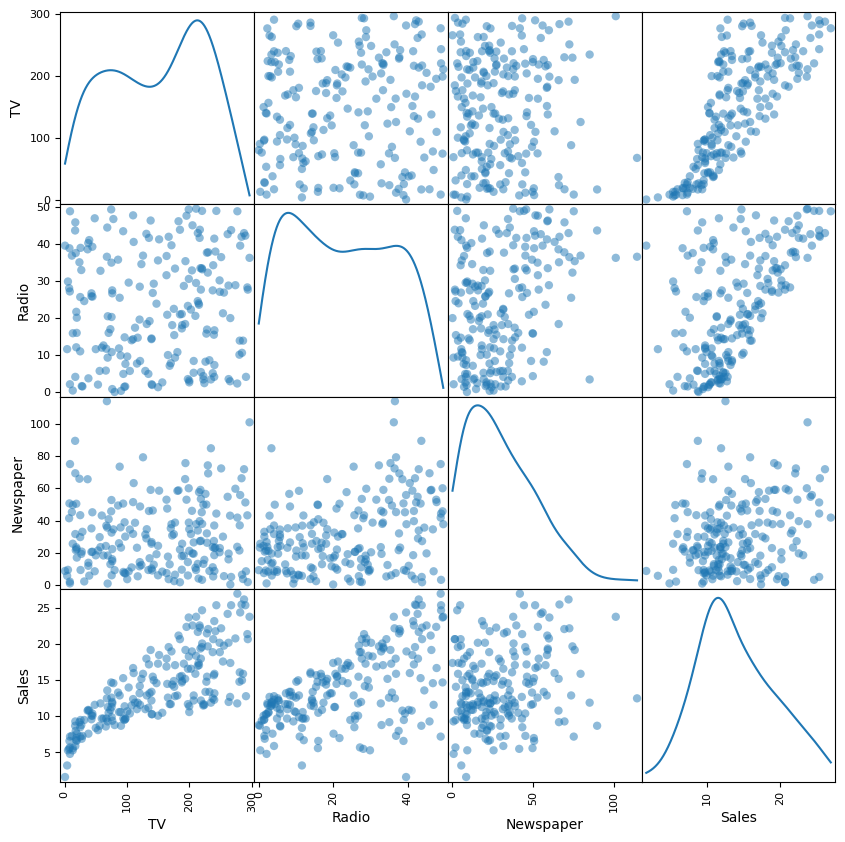

In [6]:

correlacion = df4[['TV', 'Radio', 'Newspaper', 'Sales']]
scatter_matrix(correlacion, alpha=0.5, figsize=(10, 10), diagonal='kde', marker='o', grid=True)
plt.show()

Las variables TV y Radio presentan una marcada asimetría, e incluso sugieren una posible distribución bimodal. Por otro lado, Newspaper muestra una asimetría positiva, mientras que la variable Ventas tiende a ser más simétrica en su distribución.

En los gráficos de dispersión, se observa una correlación positiva notable entre Ventas y TV, lo que indica que un mayor gasto en publicidad en TV se asocia con un incremento en las ventas. También se aprecia una correlación leve entre Ventas y Radio, aunque no tan fuerte como con TV. En cambio, no se observa ninguna correlación significativa entre Ventas y Newspaper.

La relación positiva entre Ventas y TV sugiere que la inversión en publicidad televisiva es un factor clave para aumentar el volumen de ventas.

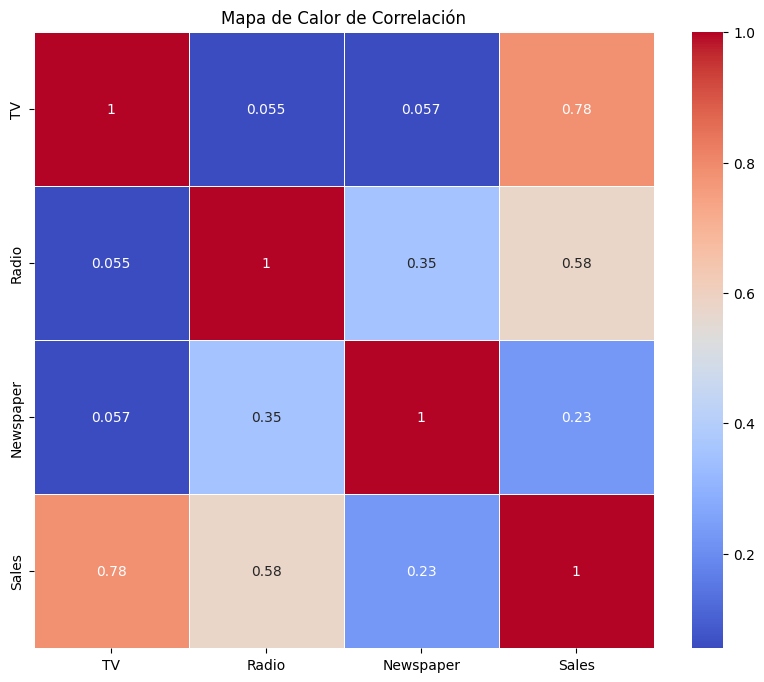

In [7]:

c_matrix = df4.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlación')
plt.show()

##

En el caso de la publicidad por Radio, la correlación es positiva moderada, con un valor de 0.58. Aunque no tan fuerte como la relación con TV, también muestra que la publicidad en Radio contribuye al aumento de las ventas, pero en menor medida.

Por otro lado, la correlación entre los gastos en publicidad por Newspaper y las Ventas es positiva baja, con un valor de 0.23, lo que indica que la inversión en periódicos tiene una influencia débil sobre las ventas.

Es importante destacar que no se observa una correlación significativa entre las variables independientes (TV, Radio y Newspaper) entre sí, lo que sugiere que los diferentes tipos de publicidad no están relacionados entre ellos en términos de gasto

Text(0, 0.5, 'Ventas')

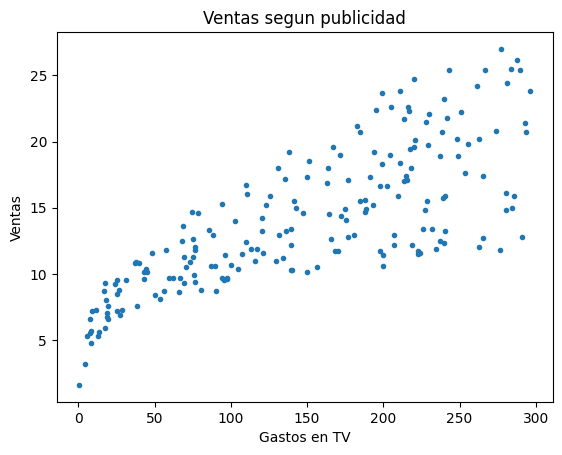

In [8]:
### Definiendo mis variables 'x' y 'y'
x = df4["TV"].values
y = df4["Sales"].values

plt.plot(x, y, ".")
plt.title("Ventas segun publicidad")
plt.xlabel("Gastos en TV")
plt.ylabel("Ventas")

##Se identifica la variable de gastos en TV y se quiere modelar con Ventas

beta0: 7.033, beta1: 0.048


Text(0, 0.5, 'Ventas(miles de unidades)')

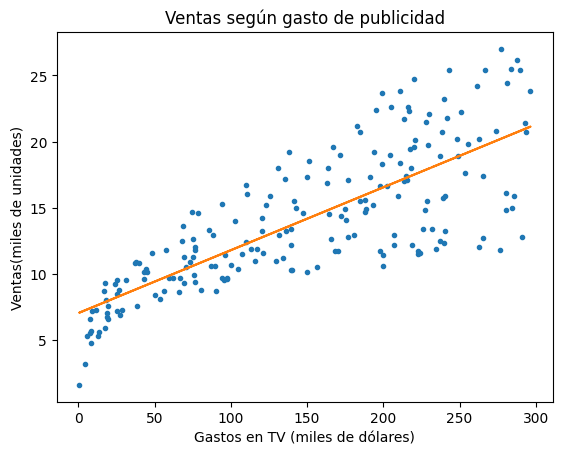

In [12]:
### Calculemos nuestra recta de regresion
b1 = np.cov(x, y)[0, 1]/np.var(x, ddof = 1)
b0 = np.mean(y)-b1*np.mean(x)
print(f"beta0: {round(b0, 3)}, beta1: {round(b1, 3)}")

### Estimamos nuestros y hat
y_hat = b0 + b1 * x

plt.plot(x, y, ".")
plt.plot(x, y_hat)
plt.title("Ventas según gasto de publicidad")
plt.xlabel("Gastos en TV (miles de dólares)")
plt.ylabel("Ventas(miles de unidades)")

Intercepto β
0
​
 =7.033: Este valor representa el valor estimado de las ventas cuando el gasto en TV es cero. Es decir, si no se invierte nada en publicidad en televisión, se espera que las ventas sean aproximadamente 7.033 unidades.

Pendiente
β
1
​
 =0.048: Este valor indica el cambio en las ventas por cada mil dólares adicionales de gasto en TV. Específicamente, por cada incremento de 1000 dólares en publicidad en TV, se espera que las ventas aumenten en 0.048 mil unidades (es decir, 48 unidades adicionales por cada 1000 dólares)

##Se contruye un modelo de regresión líneal simple.

In [52]:

X = df4['TV']  # Variable independiente
Y = df4['Sales']  # Variable dependiente

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        03:33:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

##El coeficiente de determinación,
El R2, mide la proporción de la variabilidad en la variable dependiente (Ventas) que es explicada por la variable independiente (inversión en TV) en el modelo de regresión. En este caso, un R2 de 0.61 indica que el 61% de la variabilidad en las ventas puede ser atribuida a los gastos en publicidad en TV.

Este valor de R2 es considerado moderadamente alto, lo que sugiere que el modelo tiene una buena capacidad predictiva. En otras palabras, más de la mitad de los cambios observados en las ventas están directamente relacionados con las variaciones en el gasto en publicidad en TV.

Sin embargo, el R2también indica que el 39% restante de la variabilidad en las ventas no está explicado por el gasto en TV, lo que podría deberse a otros factores no incluidos en el modelo, como publicidad en otros medios (radio, periódicos), factores económicos o competitivos, entre otros. Esto sugiere que aunque el gasto en TV es un predictor importante de las ventas, el modelo podría mejorarse incluyendo otras variables relevantes para capturar una mayor proporción de la variabilidad total.

In [19]:

coef_tv = 0.0475  # Coeficiente de TV
intercept = 7.0326  # Intercepto del modelo

# Número de anuncios en TV
num_anuncios = 5


predic = intercept + coef_tv * num_anuncios

# Desviación estándar del coeficiente TV
std_err_tv = 0.003

# Valor t para un intervalo de confianza del 95% (aproximadamente 1.96 para muestras grandes)
t_value = 1.96

# Calculamos el intervalo de confianza
ci_lower = predic - (t_value * std_err_tv * num_anuncios)
ci_upper = predic + (t_value * std_err_tv * num_anuncios)

# Mostramos los resultados
print(f"Predicción del retorno de inversión esperado: {predic}")
print(f"Intervalo de confianza del 95%: [{ci_lower}, {ci_upper}]")

Predicción del retorno de inversión esperado: 7.2701
Intervalo de confianza del 95%: [7.2407, 7.2995]


Cuando se realizan 5 anuncios a través del canal de televisión, el modelo de regresión lineal simple predice un retorno de inversión esperado en ventas aproximadamente 7,270 unidades. Esto significa que, de acuerdo con el modelo, una inversión en publicidad equivalente a 5 mil dólares en TV generaría un volumen de ventas esperado de aproximadamente 7.2701 miles de unidades.

Intervalo de confianza del 95%:
El intervalo de confianza del 95% para esta predicción es [7.2407, 7.2995]. Esto implica que, con un 95% de confianza, el verdadero incremento en las ventas esperado al realizar 5 anuncios en TV se encuentra entre 7,240 y 7,300 unidades.

Este intervalo de confianza indica la precisión de la predicción: el hecho de que el intervalo sea estrecho sugiere que la predicción del modelo es relativamente precisa. Además, refleja la certeza que se tiene de que el valor real del incremento en ventas se encuentra dentro de este rango, dado el gasto en TV.

In [53]:
#calculo de residuales
residuales = Y - y_hat

# Supuestos del modelo lineal

Esperanza de los errores es cero --- One-sample-t-test

Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling

Independendia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).

Homocedasticidad en los errores (Varianza constante) --- Test Breusch-Pagan

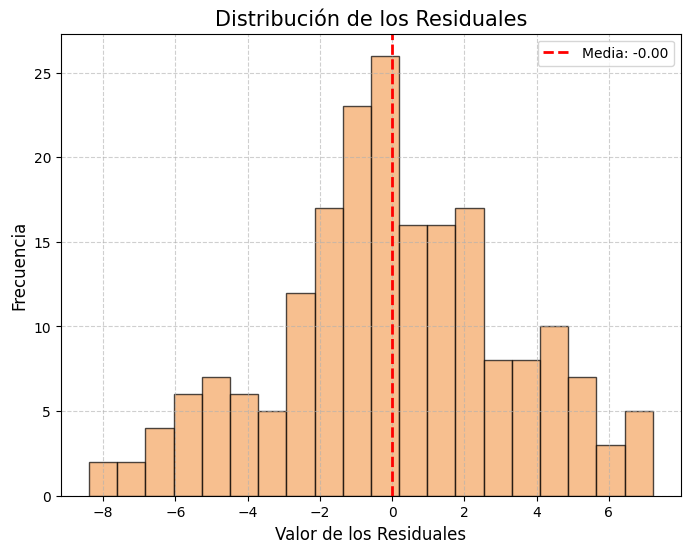

Media residuales: -1.1368683772161603e-15
Resultados t-test: TtestResult(statistic=-4.9463012327981935e-15, pvalue=0.999999999999996, df=199)


In [54]:
##Evaluación de la esperanza de los errores
plt.figure(figsize=(8, 6))
plt.hist(residuales, bins=20, color='sandybrown', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(residuales), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(residuales):.2f}')
plt.title('Distribución de los Residuales', fontsize=15)
plt.xlabel('Valor de los Residuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# One-sample-t-test
print(f"Media residuales: {np.mean(residuales)}")
print("Resultados t-test:", ttest_1samp(residuales, popmean = 0))

Un p valor de 0,099 no existe suficiente evidencia muestral para rechazar la hipotesis nula. Por lo tanto NO rechazo la hipotesis nula y puedo suponer que los residuales están centrados en cero. El test de hipotesis concuerda con lo observado en la gráfica.

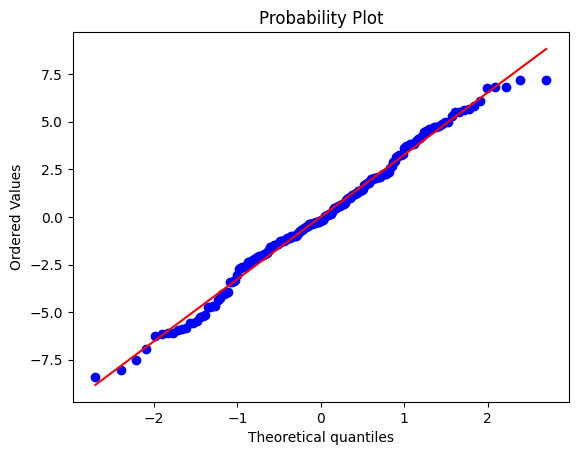

Normalidad -> Shapiro-Wilks estaditico: 0.9905306561484953, p_value=0.21332551436720226


In [55]:
#Evaluación del supuesto de normalidad
probplot(residuales, dist = "norm", plot = plt)
plt.show()
# Test de normalidad
sw = shapiro(residuales)
print(f"Normalidad -> Shapiro-Wilks estaditico: {sw[0]}, p_value={sw[1]}")


El p-valor es 0.2133, que es mayor que  el valor utilizado de 0.05. Esto significa que no hay evidencia suficiente para rechazar la hipótesis nula de que los residuos siguen una distribución normal. Cumple el supuesto de normalidad de los residuos

1.9346885372823601


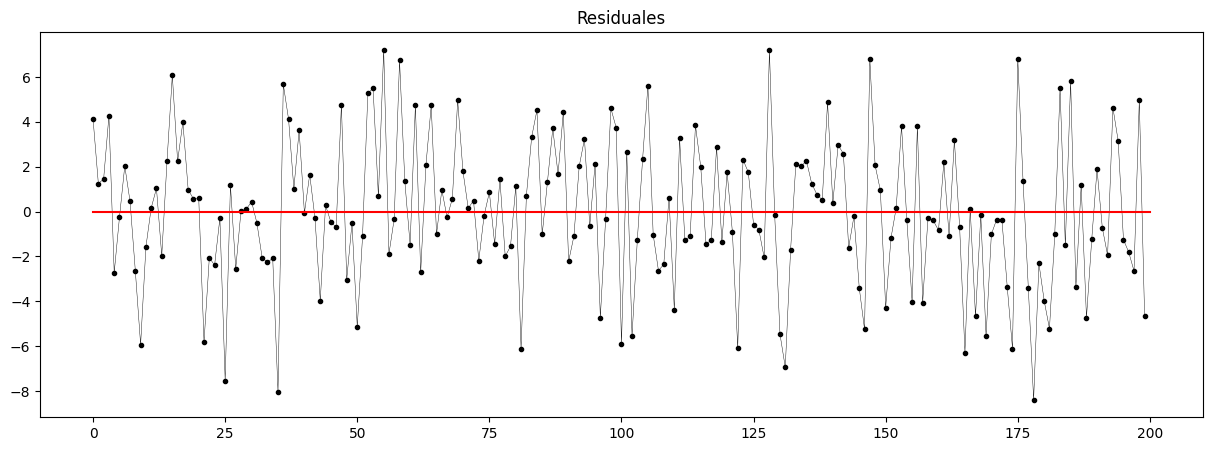

In [56]:
#Independencia de los errores
print(durbin_watson(residuales))

plt.figure(figsize = (15, 5))
plt.plot(residuales, '.-', color = "black", linewidth = 0.3)
plt.plot([0, len(residuales)], [0, 0], color = "red")
plt.title('Residuales')
plt.show()

Dado que el estadístico DW (Durbin-Watson) se encuentra entre 1.5 y 2.5, no existe suficiente evidencia en la muestra para rechazar la hipótesis nula. Por lo tanto, se puede asumir la independencia de los residuales

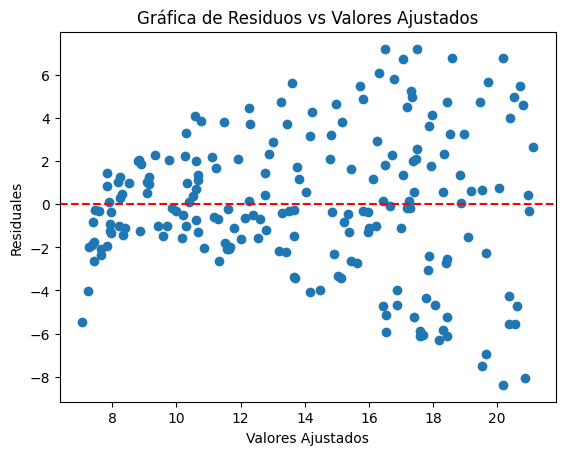

In [58]:
# Evaluacion de Homocedasticidad de los residuales

model = sm.OLS(Y, sm.add_constant(X)).fit()
valores_ajustados = model.fittedvalues

plt.scatter(valores_ajustados, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuos vs Valores Ajustados')
plt.show()

In [59]:
LM, PLM, f_test, p_value = het_breuschpagan(residuales, sm.add_constant(x), robust = False)
p_value

1.7618451425696448e-13

Con base en la gráfica y el resultado de la prueba de Breusch-Pagan, se puede concluir que el modelo presenta heterocedasticidad. Esto significa que los errores no tienen varianza constant